In [1]:
#test

In [2]:
# Import libraries
from pylab import *
import scipy.integrate as integrate
import numpy as np
# Import my libraries
import my_grc
import my_sdr as sdr
import my_jupyter
import my_ft as ft
import my_ascbin as ascbin

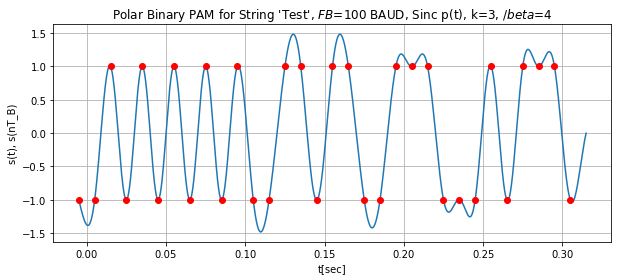

In [3]:
Fs = 44100 # Sampling rate
FB = 100   # Baud rate
N = FB     # Number of symbols
k = 3      #
alpha = .401 # 
beta = 4
polarity = 'polar' # Specify display polarity

an = hstack((zeros(round(N/2)), 1, zeros(round(N/2)-1))) 

an = ascbin.asc2bin('Test')
an = [int(x) for x in an]

# Single pulse, padded with zeros
sig_an = sdr.sigSequ(an, FB, 0)
ptype = 'sinc'
pparms = [k, beta]
sig_pt0 = sdr.pam11(sig_an,Fs,ptype,polarity,1,pparms) #Generate PAM pulse

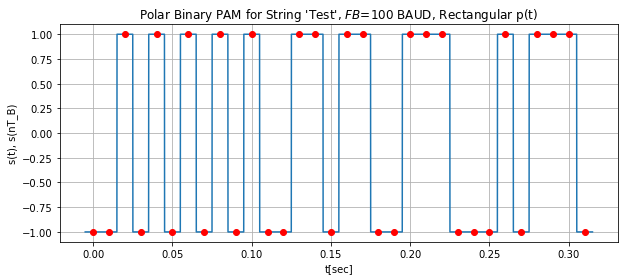

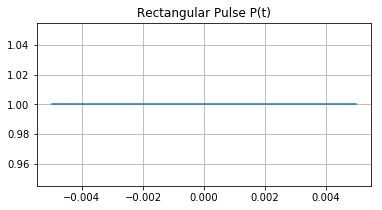

In [4]:
sig_pt0 = sdr.pam11(sig_an,Fs,'rect',polarity,2,pparms) #Generate PAM pulse

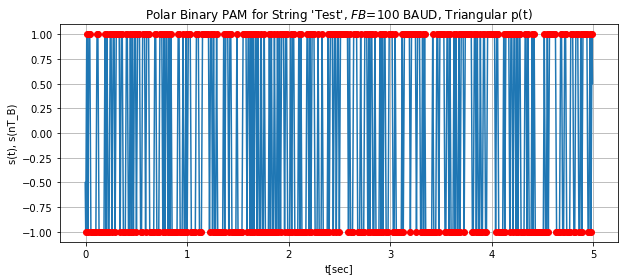

In [5]:
tlen = 5                     # Length in [s] of signal
dn = random(int(tlen*FB))       # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)  # Random unipolar binary sequence in {0,1}
an = 2*dn-1                  # Random polar binary sequence in {-1,+1}
sig_an = sdr.sigSequ(an, FB, 0)
sig_pt0 = sdr.pam11(sig_an,Fs,'tri',polarity,1,pparms) #Generate PAM pulse

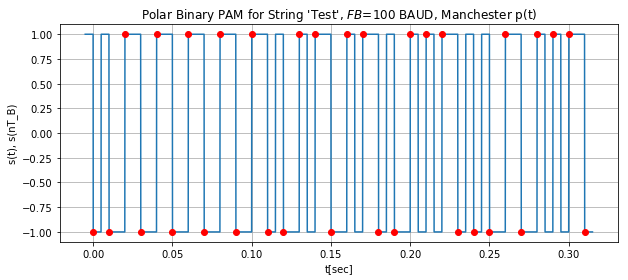

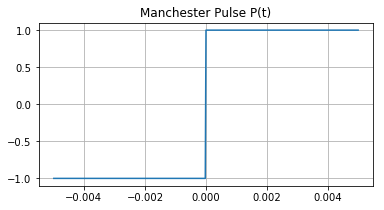

In [8]:
Fs = 44100 # Sampling rate
FB = 100   # Baud rate
N = FB     # Number of symbols

an = ascbin.asc2bin('Test')
an = [int(x) for x in an]
# print(an)
sig_an = sdr.sigSequ(an, FB, 0)
sig_pt0 = sdr.pam11(sig_an,Fs,'man','polar', 2) #Generate PAM pulse

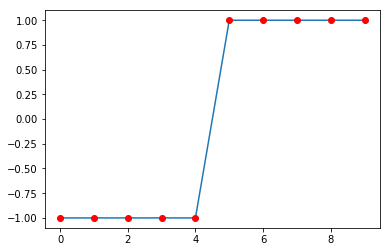

In [7]:
# Deving the pampt man pulse
sps = 11
bound = np.floor(sps/float(2))
pt = np.arange(-bound, bound, 1)
ixn = where(pt<0)[0]
ixp = where(pt>=0)[0]
pt[ixn] = -1
pt[ixp] = 1
t = arange(0, len(pt))
plot(t, pt, t, pt, 'or')
show()